In [9]:
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.166666666, random_state=42)
x_train = (x_train / 255 - 0.1307) / 0.3081
x_test = (x_test / 255 - 0.1307) / 0.3081
x_validate = (x_validate / 255 - 0.1307) / 0.3081
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)
x_validate = np.expand_dims(x_validate, 3)

In [11]:
model = keras.Sequential(
    [
        keras.layers.Conv2D(25, (12, 12), (2, 2), activation="relu", input_shape=(28, 28, 1)), 
        keras.layers.Conv2D(64, (5, 5), (1, 1), activation="relu"),
        keras.layers.MaxPool2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(1024, "relu", kernel_initializer=keras.initializers.RandomNormal(), bias_initializer=keras.initializers.Constant(0.1)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation="linear", kernel_initializer=keras.initializers.RandomNormal(), bias_initializer=keras.initializers.Constant(0.1))
    ],
)

In [12]:
model.compile(keras.optimizers.Adam(1e-4), keras.losses.SparseCategoricalCrossentropy(True), ["accuracy"])

In [13]:
cnt = 0
train_accuracy = []
validate_accuracy = []
class log(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        global cnt
        global train_accuracy
        global validate_accuracy
        global model
        cnt = cnt + 1
        if cnt % 100 == 0:
            train_accuracy.append(logs["accuracy"])
            validate_accuracy.append((model.predict(x_validate, verbose=0).argmax(axis=1) == y_validate).mean())

model.fit(x_train, y_train, batch_size=64, epochs=7, callbacks=[log()])

Epoch 1/7
782/782 [==============================] - 12s 15ms/step - loss: 0.4426 - accuracy: 0.8759
Epoch 2/7
782/782 [==============================] - 12s 16ms/step - loss: 0.1396 - accuracy: 0.9588
Epoch 3/7
782/782 [==============================] - 13s 16ms/step - loss: 0.0970 - accuracy: 0.9713
Epoch 4/7
782/782 [==============================] - 12s 16ms/step - loss: 0.0762 - accuracy: 0.9772
Epoch 5/7
782/782 [==============================] - 13s 16ms/step - loss: 0.0625 - accuracy: 0.9811
Epoch 6/7
782/782 [==============================] - 12s 15ms/step - loss: 0.0510 - accuracy: 0.9848
Epoch 7/7
782/782 [==============================] - 12s 16ms/step - loss: 0.0433 - accuracy: 0.9865


In [14]:
(model.predict(x_test).argmax(axis=1) == y_test).mean()

  1/313 [..............................] - ETA: 4s

313/313 [==============================] - 1s 2ms/step


0.9855

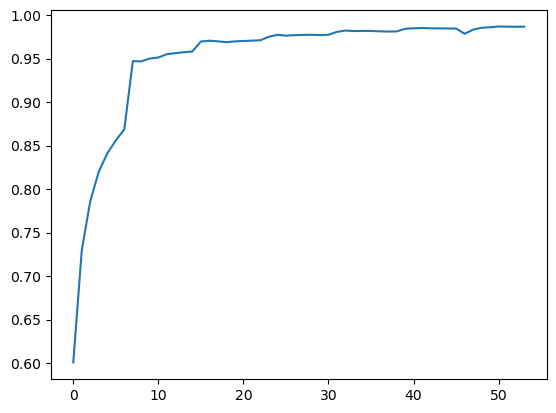

In [15]:
plt.plot(train_accuracy)

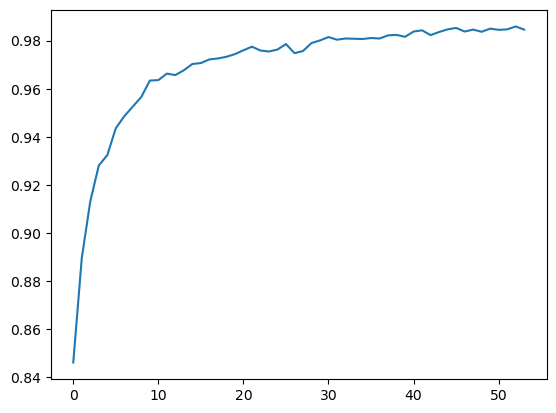

In [16]:
plt.plot(validate_accuracy)